In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df=pd.read_csv('../input/covtype.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
print('Number of samples:',len(df))

Number of samples: 581012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [6]:
df.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

In [7]:
df['OUTPUT_LABEL'] = df['Cover_Type'].apply(lambda x: x != '4')

In [8]:
print('Number of columns:',len(df.columns))

Number of columns: 56


In [9]:
df[list(df.columns)[:10]].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


In [10]:
df[list(df.columns)[10:20]].head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [11]:
df[list(df.columns)[30:40]].head()

,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [12]:
df[list(df.columns)[40:]].head()

,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,OUTPUT_LABEL
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,True
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,True
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,True
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,True
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,True


In [13]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Elevation: 1978 unique values
Aspect: 361 unique values
Slope: 67 unique values
Horizontal_Distance_To_Hydrology: 551 unique values
Vertical_Distance_To_Hydrology: 700 unique values
Horizontal_Distance_To_Roadways: 5785 unique values
Hillshade_9am: 207 unique values
Hillshade_Noon: 185 unique values
Hillshade_3pm: 255 unique values
Horizontal_Distance_To_Fire_Points: 5827 unique values
Wilderness_Area1
[1 0]
Wilderness_Area2
[0 1]
Wilderness_Area3
[0 1]
Wilderness_Area4
[0 1]
Soil_Type1
[0 1]
Soil_Type2
[0 1]
Soil_Type3
[0 1]
Soil_Type4
[0 1]
Soil_Type5
[0 1]
Soil_Type6
[0 1]
Soil_Type7
[0 1]
Soil_Type8
[0 1]
Soil_Type9
[0 1]
Soil_Type10
[0 1]
Soil_Type11
[0 1]
Soil_Type12
[0 1]
Soil_Type13
[0 1]
Soil_Type14
[0 1]
Soil_Type15
[0 1]
Soil_Type16
[0 1]
Soil_Type17
[0 1]
Soil_Type18
[0 1]
Soil_Type19
[0 1]
Soil_Type20
[0 1]
Soil_Type21
[0 1]
Soil_Type22
[0 1]
Soil_Type23
[0 1]
Soil_Type24
[0 1]
Soil_Type25
[0 1]
Soil_Type26
[0 1]
Soil_Type27
[0 1]
Soil_Type28
[0 1]
Soil_Type29
[1 0]
Soil_T

In [14]:
cols_num= ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [15]:
df[cols_num].isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [16]:
# shuffle the samples
df= df.sample(n = len(df), random_state = 42)
df = df.reset_index(drop = True)

In [17]:
# Save 30% of the data as validation and test data 
df_valid_test=df.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df)))

Split size: 0.300


In [18]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [19]:
# use the rest of the data as training data
df_train_all=df.drop(df_valid_test.index)

In [20]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [21]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 87152):1.000
Valid prevalence(n = 87152):1.000
Train all prevalence(n = 406708):1.000


In [22]:
print('all samples (n = %d)'%len(df))
assert len(df) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 581012)


In [23]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [26]:
df_train_all = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')

In [27]:
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Valid prevalence(n = 87152):1.000
Train all prevalence(n = 406708):1.000


In [28]:
col2use = [c for c in list(df_train_all.columns) if c != 'OUTPUT_LABEL']
print('Number of columns to use:', len(col2use))

Number of columns to use: 55


In [29]:
df_mean = df_train_all[col2use].mean(axis = 0)

In [30]:
df_mean.head()

Elevation                           2959.234797
Aspect                               155.762896
Slope                                 14.098171
Horizontal_Distance_To_Hydrology     269.534413
Vertical_Distance_To_Hydrology        46.429682
dtype: float64

In [31]:
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [32]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])

In [33]:
df_mean_in.head()

,col,mean_val
0,Elevation,2959.234797
1,Aspect,155.762896
2,Slope,14.098171
3,Horizontal_Distance_To_Hydrology,269.534413
4,Vertical_Distance_To_Hydrology,46.429682


In [34]:
def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [35]:
df_train_all = fill_my_missing(df_train_all, df_mean_in)

df_valid = fill_my_missing(df_valid, df_mean_in)

In [36]:
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train_all = df_train_all['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)

print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (406708, 55)
Validation shapes: (87152, 55) (87152,)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [39]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [40]:
X_train_tf = scaler.transform(X_train_all)
X_valid_tf = scaler.transform(X_valid)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [42]:
thresh = 0.5

In [57]:
import numpy as np
y_train_new = y_train_all.ravel()

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
le.fit(y_train_new)
le.classes_
y_train_transformed = le.transform(y_train_new)
le.inverse_transform(le.transform(y_train_new))
print(y_train_transformed)

[0 0 0 ... 0 0 0]


In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


class ProbaEstimator(LogisticRegression):
    """
    This little hack needed, because `cross_val_predict`
    uses `estimator.predict(X)` internally.

    Replace `LogisticRegression` with whatever classifier you like.

    """
    def predict(self, X):
        return super(self.__class__, self).predict_proba(X)[:, 1]


# some example data
X, y = make_classification()

# define your estimator
estimator = ProbaEstimator()

# get predictions
pred = cross_val_predict(estimator, X, y, cv=5)

# compute AUC score
roc1= roc_auc_score(y, pred)
roc1

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9919967987194878

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification


class ProbaEstimator(LogisticRegression):
    """
    This little hack needed, because `cross_val_predict`
    uses `estimator.predict(X)` internally.

    Replace `LogisticRegression` with whatever classifier you like.

    """
    def predict(self, X):
        return super(self.__class__, self).predict_proba(X)[:, 1]


# some example data
X, y = make_classification()

# define your estimator
estimator = ProbaEstimator()

# get predictions
pred = cross_val_predict(estimator, X, y, cv=5)

# compute AUC score
roc2=roc_auc_score(y, pred)
roc2

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9528

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification


class ProbaEstimator(DecisionTreeClassifier):
    """
    This little hack needed, because `cross_val_predict`
    uses `estimator.predict(X)` internally.

    Replace `LogisticRegression` with whatever classifier you like.

    """
    def predict(self, X):
        return super(self.__class__, self).predict_proba(X)[:, 1]


# some example data
X, y = make_classification()

# define your estimator
estimator = ProbaEstimator()

# get predictions
pred = cross_val_predict(estimator, X, y, cv=5)

# compute AUC score
roc3=roc_auc_score(y, pred)
roc3

0.7599999999999999

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification


class ProbaEstimator(GaussianNB):
    """
    This little hack needed, because `cross_val_predict`
    uses `estimator.predict(X)` internally.

    Replace `LogisticRegression` with whatever classifier you like.

    """
    def predict(self, X):
        return super(self.__class__, self).predict_proba(X)[:, 1]


# some example data
X, y = make_classification()

# define your estimator
estimator = ProbaEstimator()

# get predictions
pred = cross_val_predict(estimator, X, y, cv=5)

# compute AUC score
roc4=roc_auc_score(y, pred)
roc4

0.9103641456582633

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


class ProbaEstimator(RandomForestClassifier):
    """
    This little hack needed, because `cross_val_predict`
    uses `estimator.predict(X)` internally.

    Replace `LogisticRegression` with whatever classifier you like.

    """
    def predict(self, X):
        return super(self.__class__, self).predict_proba(X)[:, 1]


# some example data
X, y = make_classification()

# define your estimator
estimator = ProbaEstimator()

# get predictions
pred = cross_val_predict(estimator, X, y, cv=5)

# compute AUC score
roc5=roc_auc_score(y, pred)
roc5

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

0.9308

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification


class ProbaEstimator(GradientBoostingClassifier):
    """
    This little hack needed, because `cross_val_predict`
    uses `estimator.predict(X)` internally.

    Replace `LogisticRegression` with whatever classifier you like.

    """
    def predict(self, X):
        return super(self.__class__, self).predict_proba(X)[:, 1]


# some example data
X, y = make_classification()

# define your estimator
estimator = ProbaEstimator()

# get predictions
pred = cross_val_predict(estimator, X, y, cv=5)

# compute AUC score
roc6= roc_auc_score(y, pred)
roc6

0.9633999999999999

In [97]:
df_results = pd.DataFrame({'classifier':['LogisticRegression','SGDClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier'] ,
                          'auc':[roc1,2,roc3,roc4,roc5,roc6 ]})
                          

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

No handles with labels found to put in legend.


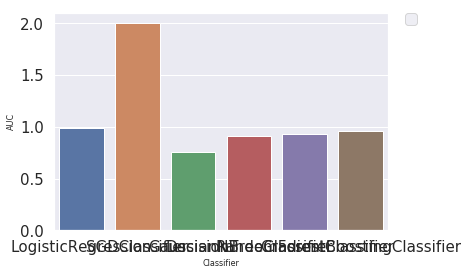

In [100]:
ax = sns.barplot(x="classifier", y="auc", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()